<a href="https://www.kaggle.com/code/sohaelshafey/swarm-behavior-classification?scriptVersionId=156020328" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import matplotlib.pyplot  as plt
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/swarm-behaviour-classification/Swarm_Behaviour.csv


# Load Data

In [2]:
df = pd.read_csv('/kaggle/input/swarm-behaviour-classification/Swarm_Behaviour.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 2401 entries, x1 to Swarm_Behaviour
dtypes: float64(2001), int64(400)
memory usage: 427.0 MB


# Statistical Analysis

In [3]:
df.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


In [4]:
df.describe()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
count,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,...,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000
mean,104.413631,-73.481853,-0.697607,0.061480,-0.147964,0.152034,-1.055732,-0.731546,-0.034915,0.077123,...,0.086824,-0.126276,0.127497,-1.526260,-0.118891,-0.012388,0.085076,26.433995,2.130679,0.341242
std,843.200079,573.329374,6.427840,7.366739,0.376078,0.588582,26.388570,20.684183,0.559690,0.628478,...,7.683539,0.378830,0.570589,73.903764,7.002853,0.555143,0.614603,34.136098,7.431911,0.474136
min,-1414.140000,-1012.180000,-18.590000,-18.410000,-1.000000,-1.000000,-944.070000,-847.910000,-2.680000,-2.680000,...,-18.440000,-1.040000,-1.000000,-4079.230000,-370.240000,-2.680000,-2.680000,0.000000,0.000000,0.000000
25%,-542.020000,-611.220000,-5.360000,-5.680000,-0.230000,-0.010000,0.000000,0.000000,-0.040000,-0.020000,...,-5.600000,-0.190000,0.000000,0.000000,0.000000,-0.070000,0.000000,2.000000,0.000000,0.000000
50%,145.300000,-157.350000,-0.450000,-1.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
75%,896.200000,425.700000,3.940000,7.260000,0.000000,0.940000,0.000000,0.000000,0.000000,0.020000,...,7.480000,0.000000,0.540000,0.000000,0.000000,0.000000,0.030000,35.000000,1.000000,1.000000
max,1406.080000,1015.800000,18.470000,18.570000,1.000000,1.040000,68.560000,234.740000,2.680000,2.680000,...,18.490000,1.000000,1.040000,255.990000,57.840000,2.680000,2.680000,142.000000,64.000000,1.000000


# Target Data

In [5]:
df['Swarm_Behaviour'].unique()

array([0., 1.])

In [6]:
df['Swarm_Behaviour'].value_counts()

Swarm_Behaviour
0.0    15355
1.0     7954
Name: count, dtype: int64

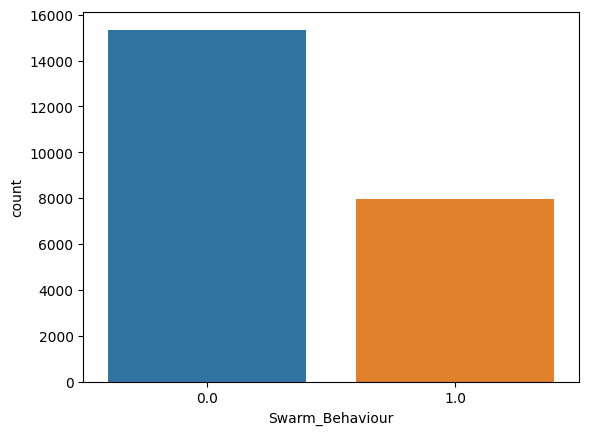

In [7]:
import seaborn as sns
sns.countplot(x="Swarm_Behaviour", data=df)
plt.show()

# Splitting Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Swarm_Behaviour',axis=1), df['Swarm_Behaviour'], test_size=0.33, random_state=42)

# Traditional Supervised Classification approach

**Pipeline (PCA, Scaler, logistic regression)**

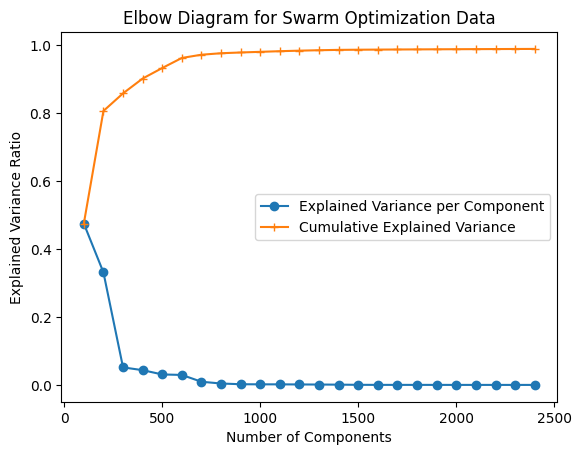

In [9]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

pca_comp = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in pca_comp:
        pipe_steps = [('pca', PCA(n_components=i)),('scaler',StandardScaler()), ('model', LogisticRegression())]
        models[str(i)] = Pipeline(steps=pipe_steps)
    return models
 

# Fit PCA model with current number of components
pca = PCA(n_components=len(pca_comp))
pca.fit(X_train,y_train)

# Calculate explained variance and cumulative explained variance for this iteration
explained_variance=pca.explained_variance_ratio_
cumulative_explained_variance=np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.plot(pca_comp, explained_variance,marker='o', label='Explained Variance per Component')

# Plot cumulative explained variance
plt.plot(pca_comp, cumulative_explained_variance,marker='+', label='Cumulative Explained Variance')
# Customize plot
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Diagram for Swarm Optimization Data')
plt.legend()

# Traditional Models Evaluations

In [10]:
# evaluate a given model using cross-validation
def evaluate_model(model, train_X, train_Y,test_x,test_y):
    model = model.fit(train_X,train_Y)
    score = model.score(train_X,train_Y)
    test_score = model.score(test_x,test_y)
    return score,test_score

train,test=list(),list()
models = get_models()
for name, model in models.items():
    score,test_score = evaluate_model(model, X_train, y_train,X_test,y_test)
    train.append(score)
    test.append(test_score)
    print('pca = %s, train: %.3f, test:%.3f' % (name,score,test_score))

pca = 100, train: 0.850, test:0.852
pca = 200, train: 0.904, test:0.898
pca = 300, train: 0.906, test:0.904
pca = 400, train: 0.910, test:0.902
pca = 500, train: 0.912, test:0.900
pca = 600, train: 0.917, test:0.900
pca = 700, train: 0.924, test:0.897
pca = 800, train: 0.928, test:0.895
pca = 900, train: 0.932, test:0.891
pca = 1000, train: 0.934, test:0.890
pca = 1100, train: 0.938, test:0.888
pca = 1200, train: 0.941, test:0.887
pca = 1300, train: 0.944, test:0.883
pca = 1400, train: 0.946, test:0.883
pca = 1500, train: 0.949, test:0.880
pca = 1600, train: 0.952, test:0.880
pca = 1700, train: 0.954, test:0.879
pca = 1800, train: 0.956, test:0.876
pca = 1900, train: 0.958, test:0.874
pca = 2000, train: 0.961, test:0.874
pca = 2100, train: 0.962, test:0.872
pca = 2200, train: 0.963, test:0.868
pca = 2300, train: 0.964, test:0.867
pca = 2400, train: 0.965, test:0.867


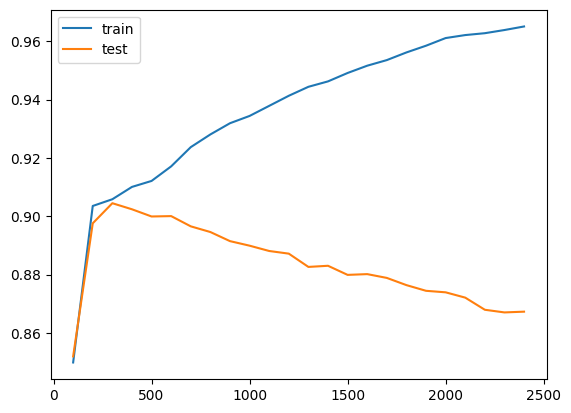

In [11]:
plt.plot(pca_comp,train)
plt.plot(pca_comp,test)
plt.legend(['train','test'])
plt.show()

# Swarm Behaviour Classification based on Machine Learning

In [12]:
import tensorflow as tf

# Generate a synthetic dataset with 300 features
num_samples = len(X_train)
num_features = 300

# Each sample has 300 numeric features
x_train = X_train

# Split the dataset into multiple nodes (simulating decentralized data)
num_nodes = 10
node_data_size = num_samples // num_nodes

# Define a simple model
class SimpleModel(tf.keras.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        return self.dense2(x)

# Train each local model on its own subset of the data
local_models = []
local_data = []
for i in range(num_nodes):
    start_idx = i * node_data_size
    end_idx = (i + 1) * node_data_size
    x_local = x_train[start_idx:end_idx]
    y_local = y_train[start_idx:end_idx]

    local_model = SimpleModel()
    local_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    local_model.fit(x_local, y_local, epochs=5)

    local_models.append(local_model)
    
    local_data.append((x_local, y_local))
# Aggregate the model updates
aggregated_model = SimpleModel()

for local_model in local_models:
    aggregated_model.set_weights([
        agg_weight + local_weight / num_nodes
        for agg_weight, local_weight in zip(aggregated_model.get_weights(), local_model.get_weights())
    ])

# Continue with the global model as needed


Epoch 1/5
49/49 [==============================] - 2s 6ms/step - loss: 47.2170 - accuracy: 0.8501
Epoch 2/5
49/49 [==============================] - 0s 6ms/step - loss: 25.6693 - accuracy: 0.9225
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 23.5600 - accuracy: 0.9276
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 23.9230 - accuracy: 0.9366
Epoch 5/5
49/49 [==============================] - 0s 5ms/step - loss: 15.5533 - accuracy: 0.9372
Epoch 1/5
49/49 [==============================] - 1s 5ms/step - loss: 108.9567 - accuracy: 0.7886
Epoch 2/5
49/49 [==============================] - 0s 5ms/step - loss: 24.6781 - accuracy: 0.9110
Epoch 3/5
49/49 [==============================] - 0s 6ms/step - loss: 18.2583 - accuracy: 0.9129
Epoch 4/5
49/49 [==============================] - 0s 6ms/step - loss: 21.6990 - accuracy: 0.9052
Epoch 5/5
49/49 [==============================] - 0s 6ms/step - loss: 18.4918 - accuracy: 0.9180
Epoch 1/5
49/49 [==

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
 
# Assuming you have the aggregated features and labels from the decentralized nodes
aggregated_x = np.concatenate([node_data[0] for node_data in local_data], axis=0)
aggregated_y = np.concatenate([node_data[1] for node_data in local_data], axis=0)

# Train a logistic regression model on the aggregated data
global_model = LogisticRegression()
global_model.fit(aggregated_x, aggregated_y)

# Evaluate the global model
global_predictions = global_model.predict(aggregated_x)
accuracy = accuracy_score(aggregated_y, global_predictions)

print("Global Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(aggregated_y, global_predictions))


Global Model Accuracy: 0.9127482383087764
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93     10298
         1.0       0.88      0.86      0.87      5312

    accuracy                           0.91     15610
   macro avg       0.90      0.90      0.90     15610
weighted avg       0.91      0.91      0.91     15610



# Evaluation of Swarm Classification based on Machine Learning

In [14]:
# Make predictions using the trained global model
test_predictions = global_model.predict(X_test)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", classification_report(y_test, test_predictions))


Test Set Accuracy: 0.8976859074362975
Test Set Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      5053
         1.0       0.87      0.83      0.85      2639

    accuracy                           0.90      7692
   macro avg       0.89      0.88      0.89      7692
weighted avg       0.90      0.90      0.90      7692

